In [14]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import numpy as np
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("data/track_audio_features_updated.csv", sep = ";", index_col=[0])

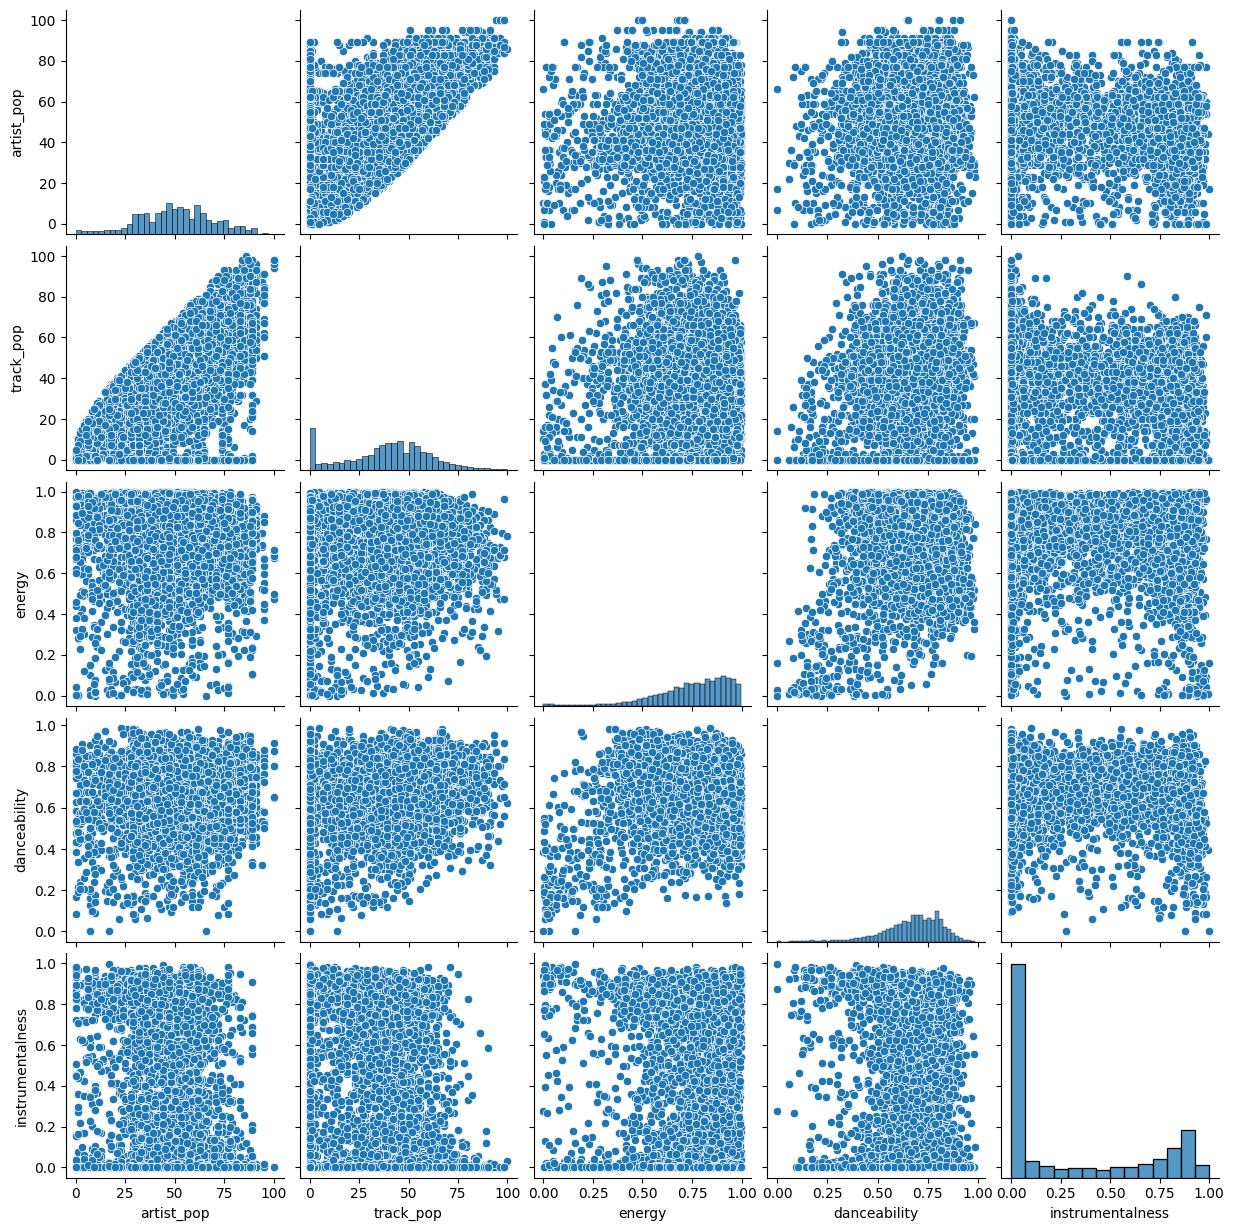

In [57]:
features = ['artist_pop', 'track_pop', 'energy', 'danceability', 'instrumentalness']
sns.pairplot(df[features])

# Clustering

In [59]:
X = df[features]

## Elbow method

In [60]:
SSE = []
for k in range(1, 25):
    clf = make_pipeline(StandardScaler(), KMeans(n_clusters=k, random_state=0))
    clf.fit(X)
    SSE.append(clf[-1].inertia_) # Inertia: Sum of distances of samples to their closest cluster center
df_SSE = pd.DataFrame({'SSE': SSE})

In [61]:
df_SSE.plot()

## Clustering

In [106]:
n_clusters = 25
clf = make_pipeline(StandardScaler(), KMeans(n_clusters=n_clusters, random_state=0))
clf.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=25, random_state=0))])

In [107]:
clusters = clf[-1].labels_
df['cluster'] = clusters

# Regression

In [108]:
# Get me a train and a test set from df with 80% and 20% of the data, X standardscaled and and the target is cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# We get X and y as numpy arrays
X = df[features].to_numpy()
y = df['cluster'].to_numpy()

# Scale X with StandardScaler and y with MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a multi class logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

# Get the accuracy of the model
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)



0.9560165975103735

In [109]:
# We save the classifier model to the folder model/ with the name model.pkl
import pickle

with open('model/model.pkl', 'wb') as f:
    pickle.dump(clf, f)

# We try cosine similarity

In [15]:
# import cosine similarity from sklearn
from sklearn.metrics.pairwise import cosine_similarity

features = ['artist_pop', 'track_pop', 'key', 'mode', 'tempo', 'time_signature', 'energy', 'danceability', 'instrumentalness']
X = df[features]

In [16]:
# We want to get pandas dummy variables for key, mode and time_signature
X = pd.get_dummies(X, columns=['key', 'mode', 'time_signature'])

In [17]:
# We scale the data with StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
# We calculate the cosine similarity
cosine_sim = cosine_similarity(X)

# Create a pandas dataframe with multiindex
df_cosine_sim = pd.DataFrame(cosine_sim, index=df.track_name, columns=df.track_name)

In [32]:
track_name = '1000 Fejl'
df_cosine_sim[track_name].sort_values(ascending=False)[1:6]

track_name
Le voci sottovetro: Moro, Lasso (after C. Gesualdo)    0.947038
Powerline                                              0.910983
Silver                                                 0.891536
Unfolding                                              0.873295
Toronto Funhouse                                       0.855761
Name: 1000 Fejl, dtype: float64